In [1]:
%matplotlib nbagg

# Cálculo numérico das probabilidades de fluxos no modelo da minha tese

In [2]:
from mpmath import *
from matplotlib.pyplot import plot as plt
from scipy.optimize import curve_fit
import numpy as np

In [3]:
libmp.BACKEND

'python'

In [5]:
def gauss(x,m,sd):
    aux = np.array(x)
    return 1/np.sqrt(2*np.pi*sd*sd)*np.exp(-(aux-m)*(aux-m)/(2*sd*sd))

In [6]:
def F(s):
    aux = nprod(lambda l: power((power(2,l+1)/s*sinh(s/power(2,l+1))),power(2,l)),[1,inf])
    return exp(-10*s)*aux

def G(s,m,b):
    aux = nprod(lambda l: power((power(2,l+1)/(s*b)*sinh(s*b/power(2,l+1))),power(2,l)),[1,inf])
    return exp(-m*s)*aux

In [19]:
%%time
invertlaplace(F,15)

CPU times: user 1.75 s, sys: 0 ns, total: 1.75 s
Wall time: 1.75 s


mpf('9.8447506007287742053708e-22')

In [57]:
a = [lambda t: invertlaplace(G,t), gauss(t,1.5/3)]

In [58]:
a(10)

[mpf('0.89958292169061383844144'), mpf('0.79788456080286535587939')]

<IPython.core.display.Javascript object>


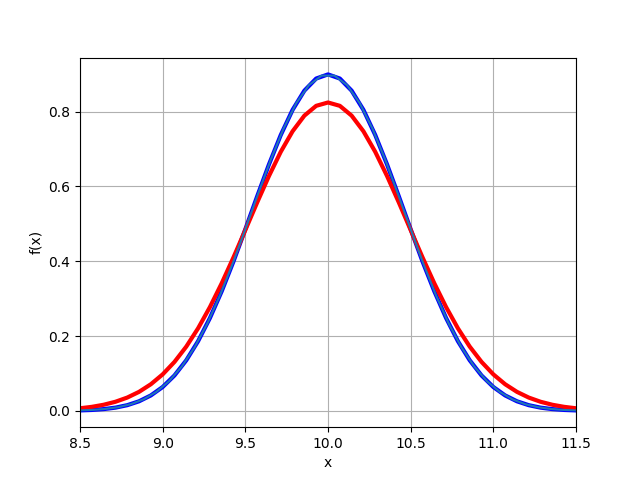

CPU times: user 1min 16s, sys: 80.3 ms, total: 1min 16s
Wall time: 1min 16s


In [61]:
%%time
#plot(lambda t: invertlaplace(F,t), [8.5,11.5], points=50)
plot([lambda t: invertlaplace(G,t), lambda t: gauss(t,1.5/3.1)], [8.5,11.5], points=42)

<IPython.core.display.Javascript object>


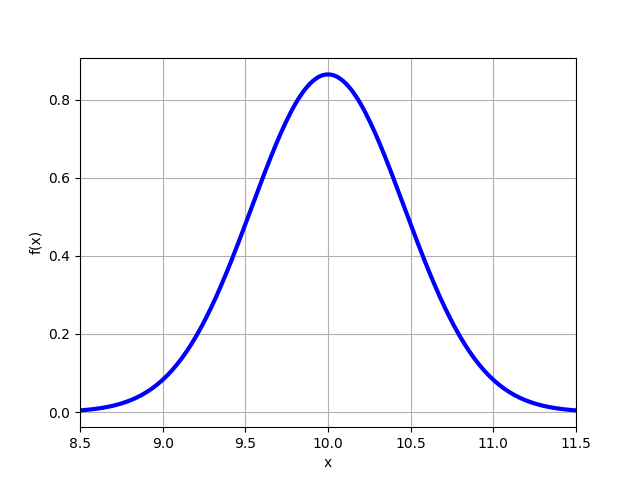

In [53]:
plot(lambda t: gauss(t,1.5/3.25), [8.5,11.5])

In [ ]:
%%time
mp.dps=120
err = 4*0.05*0.29
x = linspace(10-err,10+err,51)
y = [invertlaplace(lambda s: G(s,10,0.05),t) for t in x]
x = [float(v) for v in x]
y = [float(v) for v in y]

CPU times: user 1h 46min 41s, sys: 42.5 s, total: 1h 47min 23s
Wall time: 1h 47min 14s


In [15]:
def gauss_fit(t,sd):
    return gauss(t,10,sd)

popt, pcov = curve_fit(gauss_fit, np.array(x), np.array(y), p0=[np.sqrt(0.05*0.05/12)])

In [16]:
popt

array([ 0.01484592])

<IPython.core.display.Javascript object>


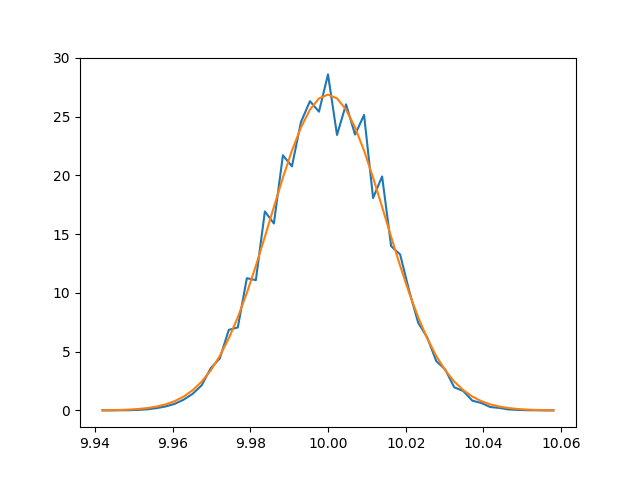

In [18]:
plt(x,y)
plt(x,gauss(x,10,popt[0]))

In [115]:
popt

array([ 0.44157792])

In [98]:
pcov

array([[  7.27147716e-07]])

In [79]:
a=mpf(1)

In [84]:
float(x)

TypeError: float() argument must be a string or a number, not 'list'

mpf('1.2247448713915890490982')